In [27]:
from datasets import Dataset0, Dataset1, Dataset2
from presets import SegmentationPresetTrain, SegmentationPresetEval
from matplotlib.pyplot import imshow, subplot
import utils
import torch
import numpy as np

In [17]:
ds1 = Dataset0("../BIO_data/RetinaDataset", transforms=SegmentationPresetEval(100, 100))

413


/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:404: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


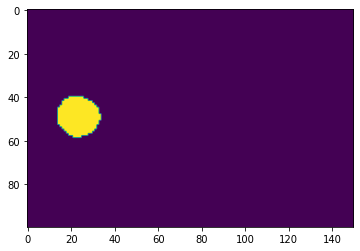

In [18]:
print(len(ds1))
img, target = ds1[1]
imshow(target[0])

In [20]:
logger = utils.MetricLogger()
train_sampler = torch.utils.data.RandomSampler(ds1)
data_loader = torch.utils.data.DataLoader(
        ds1, batch_size=32,
        sampler=train_sampler, num_workers=4,
        collate_fn=utils.collate_fn, drop_last=True)


In [21]:
tmp = None
for i in data_loader:
    tmp = i
    break

In [34]:
len(tmp)

2

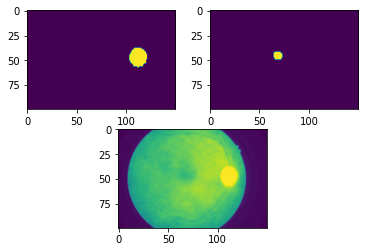

In [38]:
ax1 = subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.imshow(tmp[0][0][0])

ax2 = subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.imshow(tmp[1][0][0])


ax3 = subplot(222)
ax3.margins(2, 2)           # Values >0.0 zoom out
ax3.imshow(tmp[1][0][1])


In [32]:
import os

root = "../BIO_data/DB_UoA"


objs = list(filter(os.path.isdir, [os.path.join(root, d) for d in os.listdir(root)]))
objs.sort()
images = []
targets = []
target_type = ("idk", "idk2", "idk3")


for obj in objs:
    files = [os.path.join(obj, f) for f in os.listdir(obj)]
    files.sort()
    images.append(files[-1])
    targets.append(files[:-1])

In [ ]:
import os

root = "../BIO_data/Database"

split = "test"

dataset_path = {
    "train" : "a. Training Set",
    "test" : "b. Testing Set"
}

if split not in dataset_path:
    assert "err"


images = os.listdir(os.path.join(root, "A. Segmentation", "1. Original Images", dataset_path[split] ) )
images = [ os.path.join(root, "A. Segmentation", "1. Original Images", dataset_path[split], f) for f in images]
images.sort()

targets = {
    "1. Microaneurysms" : None,
    "2. Haemorrhages"   : None,
    "3. Hard Exudates"  : None,
    "4. Soft Exudates"  : None,
    "5. Optic Disc"     : None,
}

for t in targets:
    targets[t] = os.listdir( os.path.join(root , "A. Segmentation" , "2. All Segmentation Groundtruths" , dataset_path[split] , t) )
    targets[t] = [ os.path.join(root , "A. Segmentation" , "2. All Segmentation Groundtruths" , dataset_path[split] , t, f) for f in targets[t]]
    targets[t].sort()

In [ ]:
for i in targets:
    print (targets[i][:1])